### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

### Average Treatment Effect

In [2]:
# Load data
DB1_model = np.loadtxt('ATE_subsets/model/1DB_matched=False.csv')[:,0]
DB1_model_rot = np.loadtxt('ATE_subsets/model/1DB_matched=False_rotated.csv')[:,0]
DB1_emp_IPW = np.loadtxt('ATE_subsets/empirical/1DB_empirical_IPW_dismiss=False.csv')
DB1_emp_IPW_dismiss = np.loadtxt('ATE_subsets/empirical/1DB_empirical_IPW_dismiss=True.csv')
DB1_fuzzy = np.loadtxt('ATE_subsets/fuzzy/1DB.csv')
DB1_fuzzy_rot = np.loadtxt('ATE_subsets/fuzzy/1DB_rotated.csv')

DB3_model = np.loadtxt('ATE_subsets/model/3DB_matched=False.csv')[:,0]
DB3_model_rot = np.loadtxt('ATE_subsets/model/3DB_matched=False_rotated.csv')[:,0]
DB3_emp_IPW = np.loadtxt('ATE_subsets/empirical/3DB_empirical_IPW_dismiss=False.csv')
DB3_emp_IPW_dismiss = np.loadtxt('ATE_subsets/empirical/3DB_empirical_IPW_dismiss=True.csv')
DB3_fuzzy = np.loadtxt('ATE_subsets/fuzzy/3DB.csv')
DB3_fuzzy_rot = np.loadtxt('ATE_subsets/fuzzy/3DB_rotated.csv')

DB7_model = np.loadtxt('ATE_subsets/model/7DB_matched=False.csv')[:,0]
DB7_model_rot = np.loadtxt('ATE_subsets/model/7DB_matched=False_rotated.csv')[:,0]
DB7_emp_IPW = np.loadtxt('ATE_subsets/empirical/7DB_empirical_IPW_dismiss=False.csv')
DB7_emp_IPW_dismiss = np.loadtxt('ATE_subsets/empirical/7DB_empirical_IPW_dismiss=True.csv')
DB7_fuzzy = np.loadtxt('ATE_subsets/fuzzy/7DB.csv')
DB7_fuzzy_rot = np.loadtxt('ATE_subsets/fuzzy/7DB_rotated.csv')

DB14_model = np.loadtxt('ATE_subsets/model/14DB_matched=False.csv')[:1]
DB14_model_rot = np.loadtxt('ATE_subsets/model/14DB_matched=False_rotated.csv')[:1]
DB14_emp_IPW = np.loadtxt('ATE_subsets/empirical/14DB_empirical_IPW_dismiss=False.csv')
DB14_emp_IPW_dismiss = np.loadtxt('ATE_subsets/empirical/14DB_empirical_IPW_dismiss=True.csv')
DB14_fuzzy = np.loadtxt('ATE_subsets/fuzzy/14DB.csv')
DB14_fuzzy_rot = np.loadtxt('ATE_subsets/fuzzy/14DB_rotated.csv')

In [3]:
### Make dataframe
N = 6
df = pd.DataFrame(np.zeros((14*3*N+N, 3)), columns=['approach', 'subset_size', 'ATE'])
df['approach'] = ['Average treatment effect with embedding & learning,\non artificially mismatched data'] * (14*3+1) +\
['Average treatment effect with embedding & learning'] * (14*3+1) +\
['Average treatment effect with fuzzy matching,\non artificially mismatched data'] * (14*3+1) +\
['Average treatment effect with fuzzy matching'] * (14*3+1) +\
['Average treatment effect with matching & averaging'] * (14*3+1) +\
['Salary gap across sex for employees with same experience,\nethnicity, employer, and manually-cleaned job title (dropping 60%\nof the employees for which there is no opposite-sex correspondance)'] * (14*3+1)
df['subset_size'] = [1]*14 + [3]*14 + [7]*14 + [14] + [1]*14 + [3]*14 + [7]*14 + [14] +\
[1]*14 + [3]*14 + [7]*14 + [14] + [1]*14 + [3]*14 + [7]*14 + [14] + [1]*14 + [3]*14 + [7]*14 + [14]\
+ [1]*14 + [3]*14 + [7]*14 + [14]
df['ATE'] = np.concatenate([DB1_model_rot, DB3_model_rot, DB7_model_rot, DB14_model_rot,
                            DB1_model, DB3_model, DB7_model, DB14_model,
                            DB1_fuzzy_rot, DB3_fuzzy_rot, DB7_fuzzy_rot, np.array([DB14_fuzzy_rot]),
                            DB1_fuzzy, DB3_fuzzy, DB7_fuzzy, np.array([DB14_fuzzy]),
                            DB1_emp_IPW, DB3_emp_IPW, DB7_emp_IPW, np.array([DB14_emp_IPW]),
                            DB1_emp_IPW_dismiss, DB3_emp_IPW_dismiss, DB7_emp_IPW_dismiss,
                            np.array([DB14_emp_IPW_dismiss])])

In [4]:
### Make dataframe
N = 4
df = pd.DataFrame(np.zeros((14*3*N+N, 3)), columns=['approach', 'subset_size', 'ATE'])
df['approach'] = ['Average treatment effect with embedding & learning'] * (14*3+1) +\
['Average treatment effect with fuzzy matching'] * (14*3+1) +\
['Average treatment effect with matching & averaging'] * (14*3+1) +\
['Salary gap across sex for employees with same experience,\nethnicity, employer, and manually-cleaned job title (dropping 60%\nof the employees for which there is no opposite-sex correspondance)'] * (14*3+1)
df['subset_size'] = [1]*14 + [3]*14 + [7]*14 + [14] + [1]*14 + [3]*14 + [7]*14 + [14] +\
[1]*14 + [3]*14 + [7]*14 + [14] + [1]*14 + [3]*14 + [7]*14 + [14]
df['ATE'] = np.concatenate([DB1_model, DB3_model, DB7_model, DB14_model,
                            DB1_fuzzy, DB3_fuzzy, DB7_fuzzy, np.array([DB14_fuzzy]),
                            DB1_emp_IPW, DB3_emp_IPW, DB7_emp_IPW, np.array([DB14_emp_IPW]),
                            DB1_emp_IPW_dismiss, DB3_emp_IPW_dismiss, DB7_emp_IPW_dismiss,
                            np.array([DB14_emp_IPW_dismiss])])

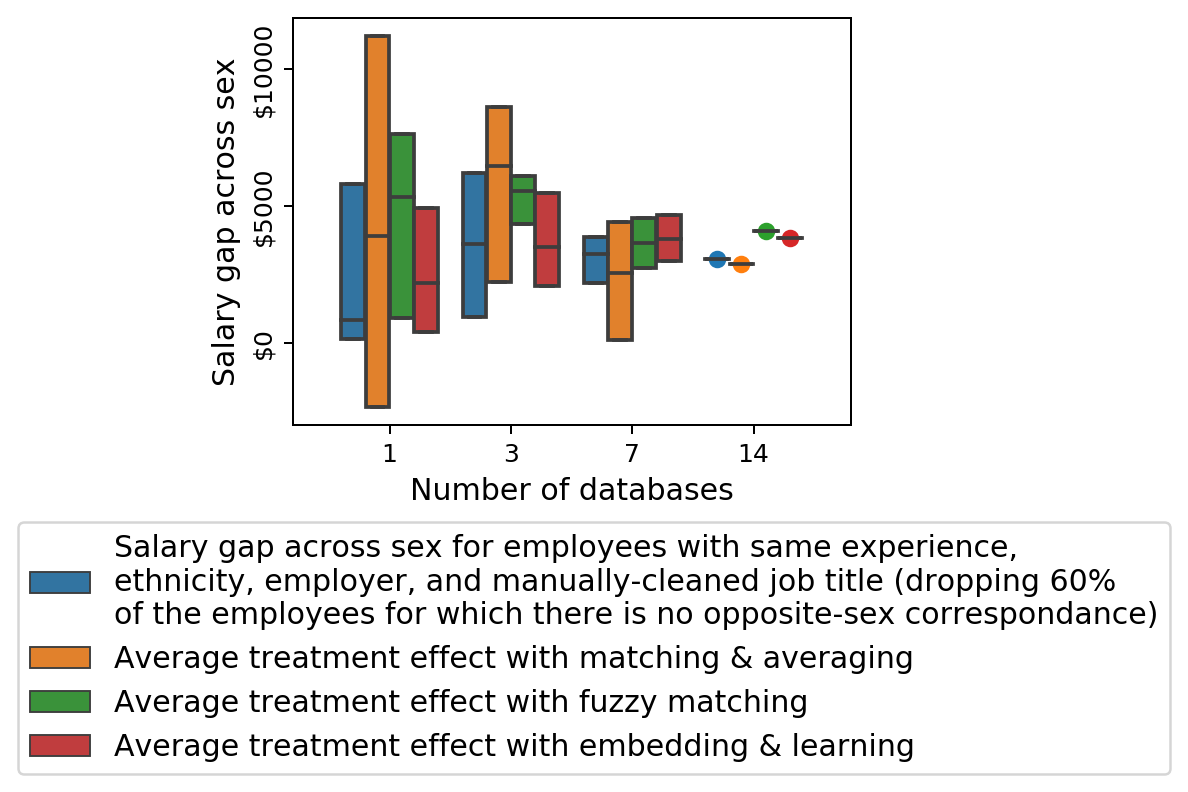

In [5]:
fig, ax = plt.subplots(dpi=180, figsize=(4,3))
sns.boxplot(x='subset_size', y='ATE', hue='approach', data=df.iloc[::-1]
, whis=0, showfliers=False)
plt.xlabel('Number of databases', size=12)
plt.ylabel('Salary gap across sex', size=12)
#plt.hlines([3982], xmin=-0.5, xmax=3.5, linestyle='--', label='Only employees\nmatched across\nsex and covariates')
#plt.plot(3.33, DB14_model_rot, 'o', color='tab:brown')
plt.plot(3.3, DB14_model, 'o', color='tab:red')
#plt.plot(3.06, DB14_fuzzy_rot, 'o', color='tab:red')
plt.plot(3.1, DB14_fuzzy, 'o', color='tab:green')
plt.plot(2.9, DB14_emp_IPW, 'o', color='tab:orange')
plt.plot(2.7, DB14_emp_IPW_dismiss, 'o', color='tab:blue')
plt.legend(bbox_to_anchor=(1.6,-.2), fontsize=12)
plt.tick_params(axis='y', rotation=90)
yticks = [0, 5000, 10000]
ax.set_yticks(yticks)
ax.set_yticklabels(labels=[f'${x}' for x in yticks], va='center')
plt.savefig(f'../latex/figures/ate_subsets.pdf', bbox_inches='tight')
plt.show()

### ATE on depleted data

In [672]:
np.array([3382, 3229, 3479, 3429, 3459]).mean()

3395.6

In [699]:
print(np.loadtxt(f'ATE_depleted/learning_97%.csv')[:,0].mean())
a = np.loadtxt(f'ATE_depleted/learning_tuned_97%.csv')[:,0]
a = a[~np.isnan(a)]
a = a[a != np.inf]
print(a.mean())

3287.429787566924
3181.591176384627


In [671]:
a0 = np.loadtxt(f'ATE_depleted/learning_tuned2_100%_0.csv')[:,0]
a1 = np.loadtxt(f'ATE_depleted/learning_tuned2_100%_1.csv')[:,0]
a2 = np.loadtxt(f'ATE_depleted/learning_tuned2_100%_2.csv')[:,0]
a3 = np.loadtxt(f'ATE_depleted/learning_tuned2_100%_3.csv')[:,0]
a0 = a0[~np.isnan(a0)]
a1 = a1[~np.isnan(a1)]
a2 = a2[~np.isnan(a2)]
a3 = a3[~np.isnan(a3)]
A = np.concatenate([a0, a1, a2, a3])
print(A.mean())
print(np.loadtxt(f'ATE_depleted/learning_100%.csv')[:len(A),0].mean())

3108.8909117019757
3032.13393396417


In [708]:
def merge_chunks(model, n_chunks, p):
    arr_list = []
    for k in range(n_chunks):
        arr_list.append(np.loadtxt(f'ATE_depleted/chunks/{model}_{p}%_{k}.csv'))
    arr_merged = np.vstack(arr_list)
    np.savetxt(fname=f'../results/ATE_depleted/{model}_{p}%.csv', X=arr_merged)
    return

merge_chunks('learning', 15, 30)
merge_chunks('learning', 10, 55)
merge_chunks('learning', 10, 75)
merge_chunks('learning', 10, 88)
merge_chunks('learning', 20, 97)

merge_chunks('fuzzy', 7, 100)
merge_chunks('fuzzy', 7, 97)
merge_chunks('fuzzy', 7, 88)
merge_chunks('fuzzy', 7, 75)
merge_chunks('fuzzy', 7, 55)
merge_chunks('fuzzy', 11, 30)

merge_chunks('learning_corrupted', 11, 100)
merge_chunks('learning_corrupted', 11, 97)
merge_chunks('learning_corrupted', 11, 88)
merge_chunks('learning_corrupted', 11, 75)
merge_chunks('learning_corrupted', 11, 55)
merge_chunks('learning_corrupted', 11, 30)
merge_chunks('learning_corrupted', 11, 0)

merge_chunks('fuzzy_corrupted', 12, 100)
merge_chunks('fuzzy_corrupted', 12, 97)
merge_chunks('fuzzy_corrupted', 12, 88)
merge_chunks('fuzzy_corrupted', 12, 75)
merge_chunks('fuzzy_corrupted', 8, 55)
merge_chunks('fuzzy_corrupted', 6, 30)
merge_chunks('fuzzy_corrupted', 6, 0)

merge_chunks('learning_tuned', 6, 100)
merge_chunks('learning_tuned', 11, 97)
merge_chunks('learning_tuned', 12, 88)
merge_chunks('learning_tuned', 8, 75)
merge_chunks('learning_tuned', 8, 55)
merge_chunks('learning_tuned', 11, 30)

In [717]:
def load_data(model, q=0.75):
    p_list = [30, 55, 75, 88, 97, 100]
    ATE_0 = np.loadtxt(f'ATE_depleted/{model}_0%.csv')[0]
    ATE_list = [np.loadtxt(f'ATE_depleted/{model}_{p}%.csv')[:,0] for p in p_list]
    x = np.array([0] + p_list)
    y_med, q_sup, q_inf = [ATE_0], [ATE_0], [ATE_0]
    for ATEs in ATE_list:
        mask = ~np.isnan(ATEs) & (ATEs != np.inf)
        ATEs = ATEs[mask]
        y_med.append(np.mean(ATEs))
        q_sup.append(np.quantile(ATEs, q))
        q_inf.append(np.quantile(ATEs, 1-q))
    return x, y_med, q_sup, q_inf

def load_data_corrupted(model, q=0.75):
    p_list = [0, 30, 55, 75, 88, 97, 100]
    ATE_list = [np.loadtxt(f'ATE_depleted/{model}_{p}%.csv')[:,0] for p in p_list]
    ATE_list = [ATEs[~np.isnan(ATEs)] for ATEs in ATE_list]
    y_med = np.array([np.mean(ATEs) for ATEs in ATE_list])
    q_sup = np.array([np.quantile(ATEs, q) for ATEs in ATE_list])
    q_inf = np.array([np.quantile(ATEs, 1-q) for ATEs in ATE_list])
    return p_list, y_med, q_sup, q_inf
    
x, ym_med, qm_sup, qm_inf = load_data('matching')
_, yl_med, ql_sup, ql_inf = load_data('learning')
_, ylt_med, qlt_sup, qlt_inf = load_data('learning_tuned')
_, yf_med, qf_sup, qf_inf = load_data('fuzzy')
_, ylc_med, qlc_sup, qlc_inf = load_data_corrupted('learning_corrupted')
_, yfc_med, qfc_sup, qfc_inf = load_data_corrupted('fuzzy_corrupted')
x_scaled = (1 - (1 - x/100)**0.5) * 100

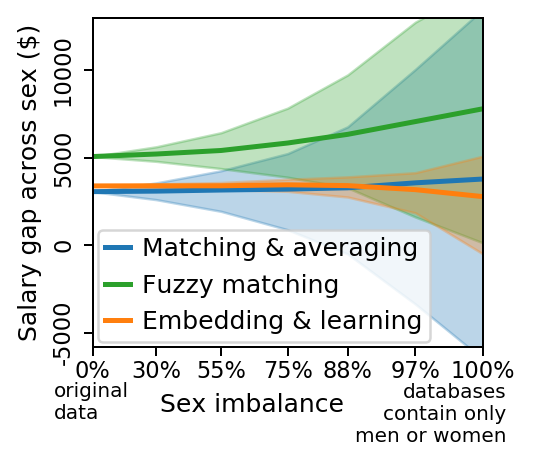

In [729]:
plt.rcParams['xtick.major.pad'] = '2'
plt.figure(dpi=180, figsize=(.79*3.5, .79*3))
plt.plot(x_scaled, ym_med, lw=2, color='C0', label='Matching & averaging')
plt.plot(x_scaled, yf_med, lw=2, color='C2', label='Fuzzy matching')
plt.plot(x_scaled, ylt_med, lw=2, color='C1', label='Embedding & learning')
plt.fill_between(x_scaled, qm_sup, qm_inf, color='C0', alpha=0.3)
plt.fill_between(x_scaled, qf_sup, qf_inf, color='C2', alpha=0.3)
plt.fill_between(x_scaled, qlt_sup, qlt_inf, color='C1', alpha=0.3)


plt.xlabel('Sex imbalance         ')
xtickslabels = ['0%\n(original data)'] + [f'{xk}%' for xk in x[1:-1]] + []

plt.xticks(x_scaled, labels=[f'{xk}%' for xk in x], ha='center', size=9)

ax = plt.gca()
plt.text(-0.1, -.22, 'original\ndata', transform=ax.transAxes, size=8)
plt.text(1.06, -.29, 'databases\ncontain only\nmen or women', transform=ax.transAxes, size=8, ha='right')
plt.xlim(x_scaled[0], x_scaled[-1])
plt.ylim(-5800, 13000)

plt.ylabel('Salary gap across sex ($)')
yticks = [-5000, 0, 5000, 10000]
plt.yticks(yticks, labels=[f'{x}' for x in yticks], va='center', rotation=90, size=9)

plt.legend(loc="lower left", frameon=True, handlelength=1, handletextpad=.5, borderaxespad=.2, borderpad=.3)
plt.tight_layout(pad=.01)
plt.savefig(f'../latex/figures/ate_depletion.pdf')

plt.show()

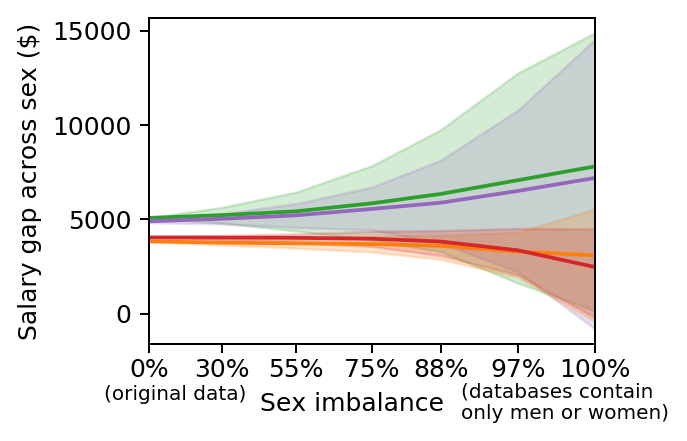

In [10]:
plt.figure(dpi=180, figsize=(.8*4, .8*3))
plt.plot(x_scaled, yf_med, lw=1.5, color='C2')
plt.plot(x_scaled, yfc_med, lw=1.5, color='C4')
plt.plot(x_scaled, yl_med, lw=1.5, color='C1')
plt.plot(x_scaled, ylc_med, lw=1.5, color='C3')
plt.fill_between(x_scaled, qf_sup, qf_inf, color='C2', alpha=0.2, label='Fuzzy matching')
plt.fill_between(x_scaled, qfc_sup, qfc_inf, color='C4', alpha=0.2, label='Fuzzy matching')
plt.fill_between(x_scaled, ql_sup, ql_inf, color='C1', alpha=0.2, label='Embedding & learning')
plt.fill_between(x_scaled, qlc_sup, qlc_inf, color='C3', alpha=0.2, label='Embedding & learning')


plt.xlabel('Sex imbalance     ')
xtickslabels = ['0%\n(original data)'] + [f'{xk}%' for xk in x[1:-1]] + []

plt.xticks(x_scaled, labels=[f'{xk}%' for xk in x], ha='center')

ax = plt.gca()
plt.text(-0.1, -.17, '(original data)', transform=ax.transAxes, size=8)
plt.text(0.7, -.23, '(databases contain\nonly men or women)', transform=ax.transAxes, size=8)
plt.xlim(x_scaled[0], x_scaled[-1])
#plt.ylim(-5500, 20000)

plt.ylabel('Salary gap across sex ($)')
# yticks = [-5000, 0, 5000, 10000]
# plt.yticks(yticks, labels=[f'{x}' for x in yticks], va='center', rotation=90)

#plt.legend(bbox_to_anchor=(0.87, 0.42), frameon=True)
#plt.savefig(f'../latex/figures/ate_depletion.pdf', bbox_inches='tight')

plt.show()

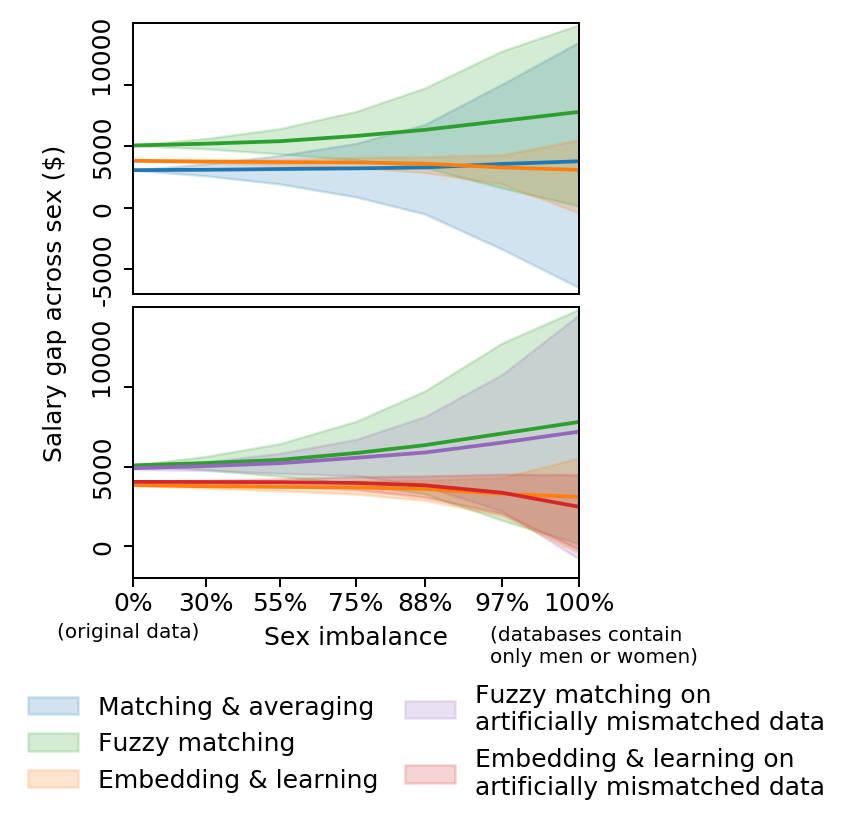

In [11]:
plt.figure(dpi=180, figsize=(.8*4, .8*3*1.7))
plt.subplot(211)
plt.plot(x_scaled, ym_med, lw=1.5, color='C0')
plt.plot(x_scaled, yf_med, lw=1.5, color='C2')
plt.plot(x_scaled, yl_med, lw=1.5, color='C1')
plt.fill_between(x_scaled, qm_sup, qm_inf, color='C0', alpha=0.2, label='Matching & averaging')
plt.fill_between(x_scaled, qf_sup, qf_inf, color='C2', alpha=0.2, label='Fuzzy matching')
plt.fill_between(x_scaled, ql_sup, ql_inf, color='C1', alpha=0.2, label='Embedding & learning')

#plt.xlabel('Sex imbalance     ')
xtickslabels = ['0%\n(original data)'] + [f'{xk}%' for xk in x[1:-1]] + []

plt.xticks(x_scaled, labels=[f'{xk}%' for xk in x], ha='center')

ax = plt.gca()
# plt.text(-0.1, -.17, '(original data)', transform=ax.transAxes, size=8)
# plt.text(0.7, -.23, '(databases contain\nonly men or women)', transform=ax.transAxes, size=8)
plt.xlim(x_scaled[0], x_scaled[-1])
plt.xticks([])
plt.ylim(-7000, 15000)

#plt.ylabel('Salary gap across sex ($)')
yticks = [-5000, 0, 5000, 10000]
ytickslabels = ['-5000', '0', '5000', '       10000']
#plt.yticks(yticks, labels=[f'{x}' for x in yticks], va='center', rotation=90)
plt.yticks(yticks, labels=ytickslabels, va='center', rotation=90)

plt.legend(bbox_to_anchor=(0.6, -1.4), frameon=False)

plt.subplot(212)
plt.plot(x_scaled, yf_med, lw=1.5, color='C2')
plt.plot(x_scaled, yfc_med, lw=1.5, color='C4')
plt.plot(x_scaled, yl_med, lw=1.5, color='C1')
plt.plot(x_scaled, ylc_med, lw=1.5, color='C3')
plt.fill_between(x_scaled, qf_sup, qf_inf, color='C2', alpha=0.2)
plt.fill_between(x_scaled, qfc_sup, qfc_inf, color='C4', alpha=0.2, label='Fuzzy matching on\nartificially mismatched data')
plt.fill_between(x_scaled, ql_sup, ql_inf, color='C1', alpha=0.2)
plt.fill_between(x_scaled, qlc_sup, qlc_inf, color='C3', alpha=0.2, label='Embedding & learning on\nartificially mismatched data')


plt.xlabel('Sex imbalance')
xtickslabels = ['0%\n(original data)'] + [f'{xk}%' for xk in x[1:-1]] + []

plt.xticks(x_scaled, labels=[f'{xk}%' for xk in x], ha='center')

ax = plt.gca()
plt.text(-0.17, -.22, '(original data)', transform=ax.transAxes, size=8)
plt.text(0.8, -.31, '(databases contain\nonly men or women)', transform=ax.transAxes, size=8)
plt.xlim(x_scaled[0], x_scaled[-1])
plt.ylim(-2000, 15000)

plt.ylabel(' '*35 + 'Salary gap across sex ($)', labelpad=10)
yticks = [0, 5000, 10000]
ytickslabels = ['0', '5000', '       10000']
#plt.yticks(yticks, labels=[f'{x}' for x in yticks], va='center', rotation=90)
plt.yticks(yticks, labels=ytickslabels, va='center', rotation=90)

plt.subplots_adjust(hspace=0.05)
plt.legend(bbox_to_anchor=(1.6, -0.305), frameon=False)
#plt.savefig(f'../latex/figures/ate_depletion.pdf', bbox_inches='tight')

plt.show()

### Comparison IPW with ML or emprical

In [12]:
X1 = []
X2 = []
for l in range(200):
    res1 = []
    res2 = []
    for _ in range(100):
        # Class 1
        yH = 60#np.random.normal()*20 + 100
        yF = 50#np.random.normal()*20 + 90
        eH = 0.5#np.random.uniform(0,1)
        eF = 1 - eH
        n = 3
        k = np.random.binomial(n, eH)
        W = np.array([1]*k + [0]*(n-k))
        Y = np.array([yH]*k + [yF]*(n-k))
        ate1 = np.mean(Y*W/eH - Y*(1-W)/eF)
        if k == 0:
            ate2 = -yF
        elif k == n:
            ate2 = yH
        else:
            ate2 = np.mean(Y*W/(k/n) - Y*(1-W)/((n-k)/n))
        res1.append(ate1)
        res2.append(ate2)
    X1.append(np.mean(res1))
    X2.append(np.mean(res2))

print(np.mean(X1))
print(np.mean(X2))

9.028333333333332
8.5175
